# Importing Packages

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True)


# Loading and Reading Data

In [6]:
df = pd.read_csv('/Users/morenomusadat/Downloads/BCG X Task/data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


# Modelling


In [7]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Data sampling

In [8]:
train_df = df.copy()

y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


A simple data preprocessing is done to prepare the dataset for modelling. The y variable is the target of our prediction, which is *churn* column from the dataset. On the other hand, the x variable contains the features (predictors) used in to predict churn. Here, we drop the columns id, churn, and Unnamed: 0 because these are either non-productive or redundant.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


To simulate real life situatino, the datset is split into training an testing with 75% of the data is used to train the model and 25% is used to evaluate the model's performance. Here, the test_size=0.25 specifies the 25% of data that should be used for testing. random_state=42 is to ensure that the split is the same every time the code runs.

### Model Training

In [10]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

During model training, the model learns the relationship between the independent variables and the target variable using the training data (X_train for features and y-train for the target).

### Evaluation

In [11]:
y_pred = model.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision, recall, f1

(0.9038882803943045,
 0.8571428571428571,
 0.04918032786885246,
 0.0930232558139535)

After trainig, the model is used to predict the target variable (churn) for the test data (X_test). This gives us the predicted churn labels (y_pred).

Here, the model is evaluated using accuracy, precision, recall, and F1 score. Accuracy is used to because it gives an overall sense of how well the model is performing. Prediction is used to see the number of correctly predicted positive churn cases out of all cases predicted as churn. Recall is used to indicate how well the model at identifying actual churn cases out of all the true churn cases. And lastly, F1 score is used to see the balance of both false positives and false negatives.

*   Accuracy: 90.39% --> This indicates that the model is correctly predicting 90.39% of the instances.
*   Precision: 82.61 --> Among the predicted positive churn instances, 82.61% were correctly classified as churn.
*   Recall: 5.19% --> Only 5.19% of the actual churn cases were identified by the model, indicating poor performance in detecting churn instances.
*   F1 Score --> This is the harmonic mean of precision and recall, which suggests that while the model is performing well in predicting positive churn instances (precision), it is missing most of the actual churn cases (low recall), leading to a low F1 score.

Given the low recall and F1 score, the model might benefit from further tuning. The low recall (5.19%) is the most concerning metric.   The model is missing the majority of the customers who are actually going to churn. Since the model's recall is low, the F1 score is also low. This suggests that, although the model is good at predicting non-churn cases, it gails to predict most churn cases correctly, which is a critical aspect of churn prediction.Hence, the model's performance is not fully satisfactory.





## Model Understanding

In [13]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

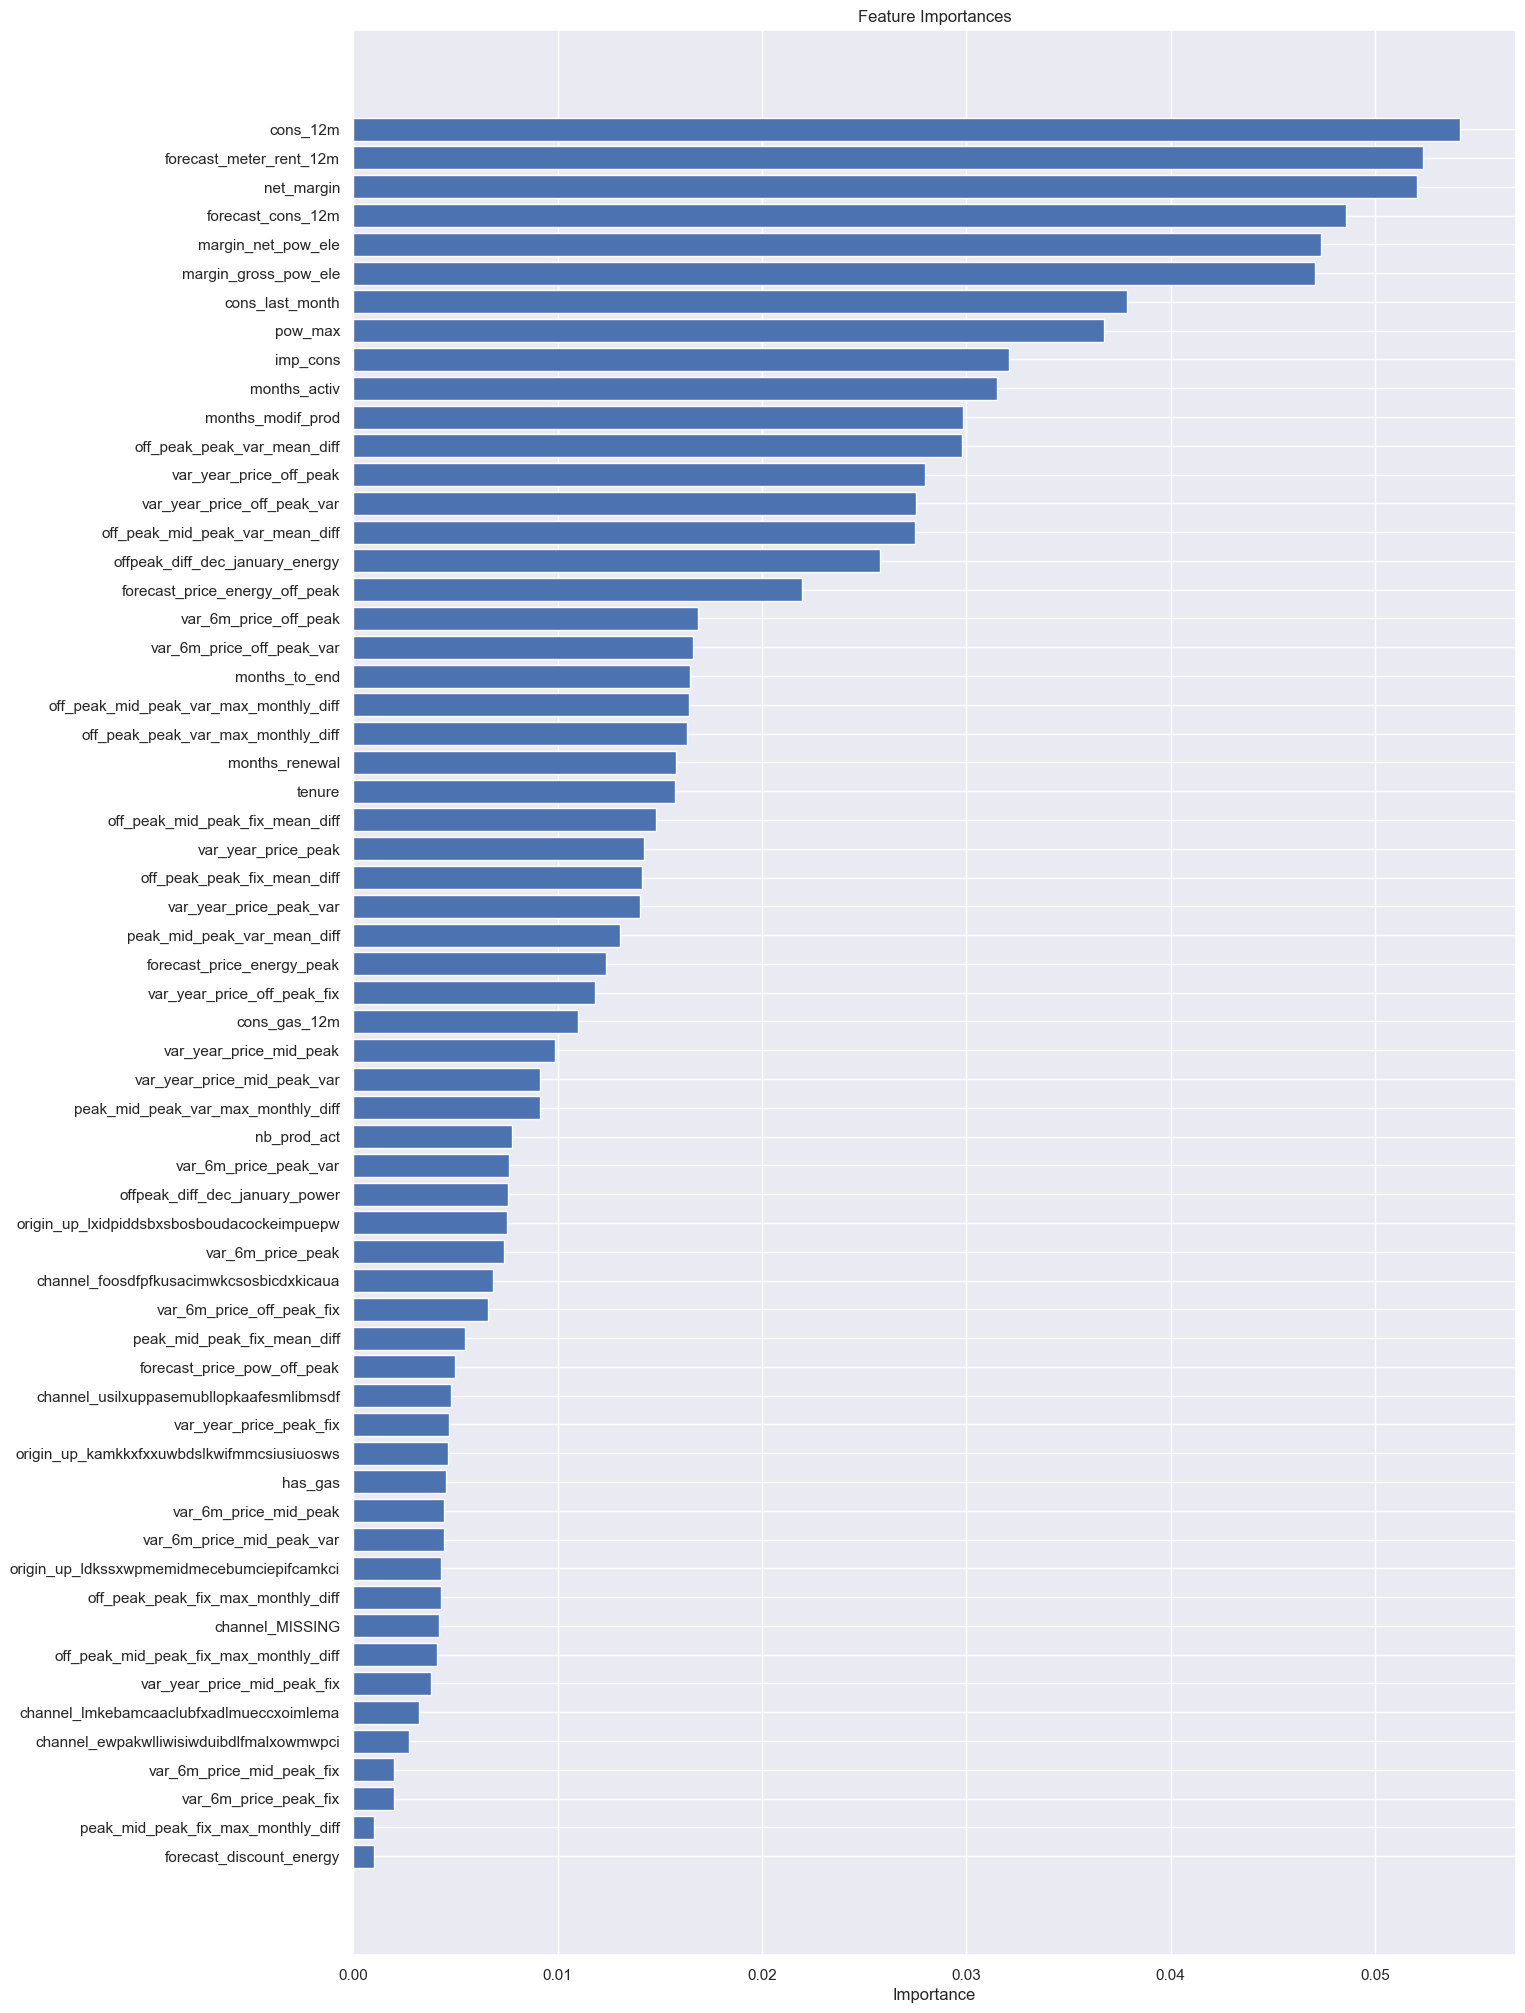

In [14]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

The chart above reveals the following key insights:

- Net margin and consumption over the past 12 months are the most significant contributors to churn in this model.
- The margin from power subscriptions also plays a considerable role in influencing churn.
- Time-related factors appear to be important, particularly the length of customer activity, tenure, and the duration since their last contract update.
- The feature suggested by our colleague ranks in the upper half in terms of influence, and some derived features actually have a greater impact.
- Price sensitivity features are somewhat dispersed and do not emerge as primary drivers for customer churn.

The final point is crucial because it ties back to our initial hypothesis:

    > Is churn primarily driven by customers' price sensitivity?

The results from the feature importance analysis suggest that price sensitivity is not a dominant factor but does have a weak influence. Nevertheless, further experimentation is required to draw a definitive conclusion.